# experiment

> Notebook where the training experiments take place

In [ ]:
#| default_exp experiment

In [ ]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *
from fastcore.utils import *

In [ ]:
#| hide
import os

if os.getenv("COLAB_RELEASE_TAG"):
   print("Running in Colab")       
   from google.colab import drive
   drive.mount('/content/drive')
   %cd /content/drive/MyDrive/GitHub/birdclef_2023
   %pip install wandb
else:
   print("NOT in Colab")

NOT in Colab


In [ ]:
#| export
import wandb

from birdclef.trainer import train

These are the variables that must be set to start an experiment:

1. **project**: The name of the wandb project where the training, evaluation and test results will be logged and stored.

2. **entity**: The wandb entity associated with the project.

3. **sweep_name**: The name given to the sweep configuration, which defines the hyperparameter search setup for an experiment. It's used to organize and categorize different hyperparameter tuning runs.

4. **method**: The method or strategy used for hyperparameter tuning. In this case, 'random' suggests that hyperparameters will be randomly chosen from the specified ranges or values during the sweep.

5. **n_runs**: The number of runs or iterations that will be performed during the hyperparameter sweep. Each run involves training the model with a specific set of hyperparameters.

6. **run_name**: The name given to each individual run or iteration of the experiment. It helps identify and differentiate between different runs, providing a meaningful label for tracking and analysis.

7. **device**: The computational device (e.g., 'cpu', 'cuda') on which the training and evaluation of the model will be performed.

8. **train_key**: Key or identifier used to access the training dataset. Refer to `get_dataset` for info about available keys.

9. **val_key**: Key or identifier used to access the validation dataset. Refer to `get_dataset` for info about available keys.

10. **test_key**: Key or identifier used to access the test dataset. Refer to `get_dataset` for info about available keys.

11. **batch_size**: The number of samples in each mini-batch during training. It affects the efficiency of the training process and the model's ability to generalize.

12. **num_workers**: The number of worker threads used to load data in parallel during training. It can help speed up the data loading process.

13. **pin_memory**: A boolean indicating whether to pin memory for faster data transfer to the GPU. This is often beneficial when using a GPU for training.

14. **model_key**: Key or identifier used to specify the model architecture to be used for training. Refer to `get_model` for info about available keys.

15. **optimizer_key**: Key or identifier used to specify the optimizer to be used during the training process. Refer to `get_optimizer` for info about available keys.

16. **learning_rate**: A list of learning rates to be used by the optimizer during training. Learning rate is a crucial hyperparameter affecting the convergence and performance of the model.

17. **loss_key**: Key or identifier used to specify the loss function to be used during training. Refer to `get_loss_func` for info about available keys.

18. **metric**: The metric used to evaluate the model's performance. This metric is used to compare and choose the best model in a single run. Refer to `compute_metrics` for info about available metrics.

19. **epochs**: The number of epochs or complete passes through the training dataset during the training process. One epoch is a single pass through the entire training dataset.

20. **callback_step**: A callback function will be called every *n* steps where *n* is the number defined as *callback_step*

21. **callback_func**: 

In [ ]:
project = 'bird-clef-cjavelanda'
entity = '4projects'

sweep_name = 'test' 
method = 'random'
n_runs = 1

run_name = 'test_works' 
device = 'cpu' 
train_key = 'train_simple' 
val_key = 'val_simple' 
test_key = 'test_simple'
batch_size = 16
num_workers = 2
pin_memory = False
model_key = 'simple_efficient_net_v2_s' 
optimizer_key = 'adamw' 
learning_rate = [0.001] 
loss_key = 'ce'
metric = 'f1'
epochs = 1
callback_step = 1
callback_key = 'show'

Creating the experiment configuration as dict.

In [ ]:
sweep_config = {
    'name': sweep_name,
    'method': method,
    'parameters': {
        'run_name': {
            'value': run_name
        },
        'device': {
            'value': device
        },
        'train_key': {
            'value': train_key
        },
        'train_kwargs': {
            'parameters': {
                'batch_size': {
                    'value': batch_size
                },
                'shuffle': {
                    'value': True
                },
                'num_workers': {
                    'value': num_workers 
                },
                'pin_memory': {
                    'value': pin_memory
                }
            }
        },
        'val_key': {
            'value': val_key
        },
        'test_key': {
            'value': test_key
        },
        'val_kwargs': {
            'parameters': {
                'batch_size': {
                    'value': batch_size
                },
                'shuffle': {
                    'value': False
                },
                'num_workers': {
                    'value': num_workers 
                },
                'pin_memory': {
                    'value': pin_memory
                }
            }
        },
        'model_key': {
            'value': model_key
        },
        'optimizer_key': {
            'value': optimizer_key
        },
        'optimizer_kwargs': {
            'parameters': {
                'lr': {
                    'values': learning_rate
                },
            }
        },
        'loss_key': {
            'value': loss_key
        },
        'metric': {
            'value': metric
        },
        'epochs': {
            'value': epochs
        },
        'callback_step': {
            'value': callback_step
        },
        'callback_key': {
            'value': callback_key
        }
    }  
}

In [ ]:
#| hide
# Need to change wd when running in colab
if os.getenv("COLAB_RELEASE_TAG"):
  %cd /content/drive/MyDrive/GitHub/birdclef_2023/nbs

Running a sweep.

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: uxu8ouu4
Sweep URL: https://wandb.ai/4projects/bird-clef-cjavelanda/sweeps/uxu8ouu4


wandb: Agent Starting Run: vlnmjis5 with config:
wandb: 	callback_key: show
wandb: 	callback_step: 30
wandb: 	device: cpu
wandb: 	epochs: 1
wandb: 	loss_key: ce
wandb: 	metric: f1
wandb: 	model_key: simple_efficient_net_v2_s
wandb: 	optimizer_key: adamw
wandb: 	optimizer_kwargs: {'lr': 0.001}
wandb: 	run_name: test_works
wandb: 	test_key: test_simple
wandb: 	train_key: train_simple
wandb: 	train_kwargs: {'batch_size': 16, 'num_workers': 2, 'pin_memory': False, 'shuffle': True}
wandb: 	val_key: val_simple
wandb: 	val_kwargs: {'batch_size': 16, 'num_workers': 2, 'pin_memory': False, 'shuffle': False}
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chavelanda (4projects). Use `wandb login --relogin` to force relogin


Training epoch 0


  0%|          | 0/53 [00:00<?, ?it/s]

Showing ../data/audio_data/wlwwar/XC214881.ogg
The shape of the output: torch.Size([16, 3])
Ground truth: 2
Outputs: tensor([0.2364, 0.5013, 0.2623], grad_fn=<SelectBackward0>)


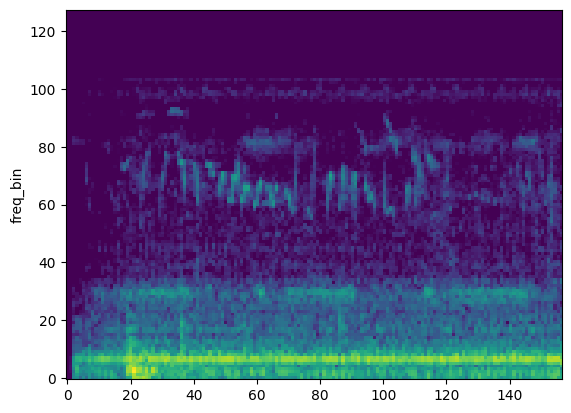

 25%|██▍       | 13/53 [01:19<03:11,  4.78s/it]

In [ ]:
#|eval: false
#|output: false
sweep_id = wandb.sweep(sweep_config, project=project, entity=entity)
wandb.agent(
    sweep_id,
    train,
    count=n_runs)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()